In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

tornado_raw = pd.DataFrame()
directory = "tornado_cleaned_files"
for entry in os.scandir(directory):
    if entry.path.endswith(".csv"):
        data = pd.read_csv(entry.path)
        tornado_raw = tornado_raw.append(data)

tornado_cleaned = tornado_raw[(tornado_raw['EVENT_TYPE'] == 'Tornado')]
#                               & ((tornado_raw["TOR_F_SCALE"] == "EF3") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "EF4") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "EF5") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "F3") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "F4") |
#                                                                           (tornado_raw["TOR_F_SCALE"] == "F5"))]
tornado_count = pd.DataFrame(tornado_cleaned.groupby('YEAR')['EVENT_TYPE'].count())
tornado_count = tornado_count.rename(columns={'EVENT_TYPE':'Severe_Tornado_Count'})
tornado_count.reset_index(inplace=True)

In [3]:
temp_directory = "temperature_average"
temp_data = pd.read_csv(f"{temp_directory}/average_temp.csv")
temp_data.rename(columns={'Year':'YEAR'}, inplace = True)

In [4]:
tornado_count = tornado_count.merge(temp_data,on='YEAR',how="inner")

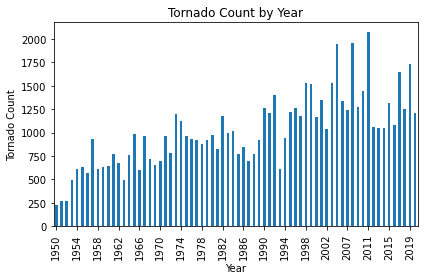

In [36]:
tornado_count.plot('YEAR','Severe_Tornado_Count',kind="bar",legend=False)
plt.xticks(rotation='vertical')
plt.title('Tornado Count by Year')
plt.ylabel('Tornado Count')
plt.xlabel('Year')
plt.locator_params(axis='x', nbins=20)
plt.tight_layout()
plt.savefig("tornado_plots_images/tornado_count_bar.png")
plt.show()



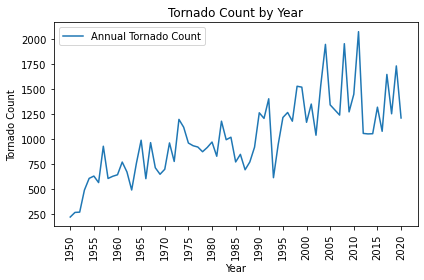

In [37]:
tornado_count.plot('YEAR','Severe_Tornado_Count',kind="line",label='Annual Tornado Count')
plt.xticks(rotation='vertical')
plt.title('Tornado Count by Year')
plt.ylabel('Tornado Count')
plt.xlabel('Year')
plt.locator_params(axis='x', nbins=20)
plt.tight_layout()
plt.savefig("tornado_plots_images/tornado_count_line.png")
plt.show()

r^2 correlation between US average temp and tornado count: 0.2354228742526265


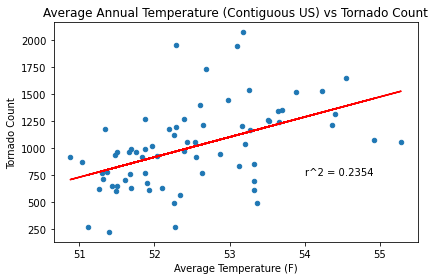

In [40]:
tornado_count.plot('Average_Temp','Severe_Tornado_Count',kind = "scatter")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Tornado Count')

plt.title('Average Annual Temperature (Contiguous US) vs Tornado Count')
(slope, intercept, rvalue, pvalue, stderr) = linregress(tornado_count['Average_Temp'], tornado_count['Severe_Tornado_Count'])
print(f'r^2 correlation between US average temp and tornado count: {rvalue**2}')
regress_values = tornado_count['Average_Temp'] * slope + intercept
plt.plot(tornado_count['Average_Temp'],regress_values,color='red')
plt.text(54,750,f"r^2 = {round((rvalue**2),4)}")
plt.tight_layout()
plt.savefig("tornado_plots_images/temp_vs_tornado_count.png")
plt.show()

In [ ]:
predicted_temp_2022 = 53.71
predicted_tornadoes_2022 = predicted_temp_2022*slope+intercept

In [ ]:
print(f"The number of tornadoes in the US predicted for 2022 is {round(predicted_tornadoes_2022,0)}")